## GOAL
1. Learn to create **Directed networks** by **networkx** in **Python**
2. Learn to create **Weighted networks** by **networkx** in **Python**
3. Learn to get **shortest path** by **networkx** in **Python**

## 01 INITIALIZE A DIRECTED NETWORK AND DRAW

- References: https://networkx.org/documentation/stable/reference/classes/digraph.html

In [2]:
import igraph as ig

g = ig.Graph(directed=True)
g.add_vertices(['a','b','c','d','e','f','g'])
g.add_edges([(0,1), (6,1), (3,5), (0,4), (2, 5), (6, 5), (1, 3), (2,4), (2,4)])

<AxesSubplot: >

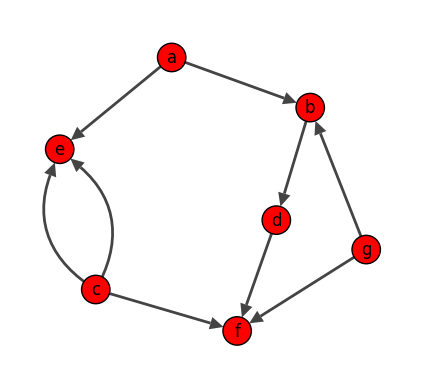

In [3]:
import matplotlib.pyplot as plt
layout = g.layout("kk")
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target= ax, vertex_label=[node["name"] for node in g.vs])

## 02 INITIALIZE A WEIGHTED NETWORK AND DRAW

- References: https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

In [5]:
#import igraph as ig
import random

g2 = ig.Graph()
g2.add_vertices(['a','b','c','d','e','f','g'])
g2.add_edges([(0,1), (6,1), (3,5), (0,4), (2, 5), (6, 5), (1, 3), (2,4)])
g2.es['width'] = [random.randint(1,6) for i in range(len(list(g2.es)))] # igraph将权重命名为width，就可以绘制出粗细不同的带权图
print(list(g2.es))

[igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 0, {'width': 2}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 1, {'width': 1}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 2, {'width': 4}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 3, {'width': 3}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 4, {'width': 4}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 5, {'width': 1}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 6, {'width': 3}), igraph.Edge(<igraph.Graph object at 0x000001F09571A240>, 7, {'width': 6})]


<AxesSubplot: >

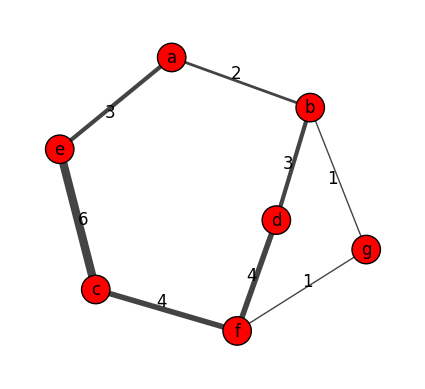

In [6]:
#import matplotlib.pyplot as plt
layout = g2.layout("kk")
fig, ax = plt.subplots()
#print(list(g2.es))
ig.plot(g2, layout=layout, target= ax, vertex_label=[node["name"] for node in g2.vs], edge_label=[e['width'] for e in g2.es]) 

## 03 CREATE A GRAPH AND PRINT ITS SHORTEST PATH

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path

In [31]:
#import igraph as ig
#import random

g3 = ig.Graph(directed=True)
g3.add_vertices(['a','b','c','d','e','f','g', 'h', 'i', 'j', 'k'])
node_count = len(g3.vs) 
#随机生成边的程序，算法原理：
#n个节点索引0~n-1，将可能的n(n-1)条边映射为1~n(n-1)的自然数，计算公式：点i到j(i!=j)，i<j: edge_index= i*(n-1)+j-1; i>j:edge_index= i*(n-1)+j
#随机生成一定的edge_index，计算得到 i=floor(edge_index/(n-1)); (1)i<=edge_index%(n-1), j=edge_index%(n-1)+1; i>edge_index%(n-1), j=edge_index%(n-1)
density = 0.25
edge_indexs = []
for edge_index in range(1, 1 + node_count*(node_count-1)):
    if random.random() < density:
        i=round(edge_index/(node_count-1)-0.5)
        rest = edge_index%(node_count-1)
        if i <= rest:
            j = rest + 1
        else:
            j = rest    
        try:
            g3.add_edge(i, j, weight=random.randint(1, 7))
        except Exception:
            print(edge_index, i, j)

#g3.es['width'] = [random.randint(1,6) for i in range(len(list(g3.es)))] 
#print(list(g3.es))

<AxesSubplot: >

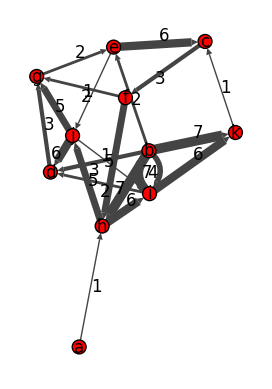

In [32]:
layout = g3.layout("fr")
fig, ax = plt.subplots()
ig.plot(g3, layout=layout, target=ax, vertex_label=[node["name"] for node in g3.vs], edge_label=[e['weight'] for e in g3.es], edge_width=[e['weight'] for e in g3.es]) 

从点d到点i的最短路径是：d->g->e->j->i
路径长度为: 7


<AxesSubplot: >

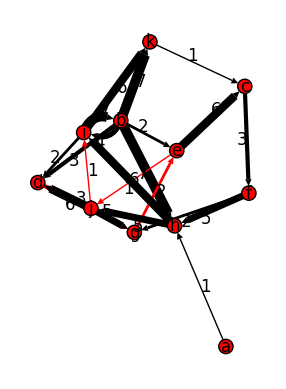

In [37]:
# 寻找shortest pathn绘制
# igraph对应的函数是distances
a = [i for i in range(node_count)]
random.shuffle(a)
source, target = a[0], a[1]
print(f'从点{g3.vs.select(source)["name"][0]}到点{g3.vs.select(target)["name"][0]}的最短路径是：', end='')
re = g3.get_shortest_paths(v=source, to=target, weights="weight", output="vpath", algorithm="dijkstra")[0]
colors = ['black'] * len(g3.es)
g3.es['color'] = colors

if len(re) < 2:
    print('两点不连通')
else:
    print('->'.join(g3.vs.select(re)["name"]))
    #print()
    # 计算路径长度，并改变边的颜色
    path_len = 0
    for i in range(len(re)-1):
        edge_sele = g3.es.select(_source=re[i], _target=re[i+1])[0]
        path_len += edge_sele['weight']
        edge_sele['color'] = 'red'
    print(f"路径长度为: {path_len}")


#plot
layout = g3.layout("fr")
fig, ax = plt.subplots()
ig.plot(g3, layout=layout, target=ax,
        vertex_label=[node["name"] for node in g3.vs],
        edge_label=[e['weight'] for e in g3.es],
        edge_width=[e['weight'] for e in g3.es]) 

